In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_time_series(time_series: pd.DataFrame, fitted_curve: pd.DataFrame = None, predictions: pd.DataFrame = None, num_series: int = None) -> None:
    if not num_series:
        num_series = time_series.shape[1]

    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    colors = [color_cycle[i % len(color_cycle)] for i in range(num_series)]

    for i, (_, series) in enumerate(time_series.iloc[:, :num_series].items()):
        color = colors[i]
        series.plot(color=color, figsize=(20, 7))
        if fitted_curve is not None:
            fitted_curve.iloc[:, i].plot(color=color, linestyle="--")

        if predictions is not None:
            predictions.iloc[:, i].plot(color=color, linestyle=":")

    if predictions is not None:     
        plt.axvline(predictions.index[0], color="red", linestyle="--")
    
    plt.show()

In [3]:
df = pd.read_csv("data/tv_viewership.csv", parse_dates=["date"]).set_index("date")

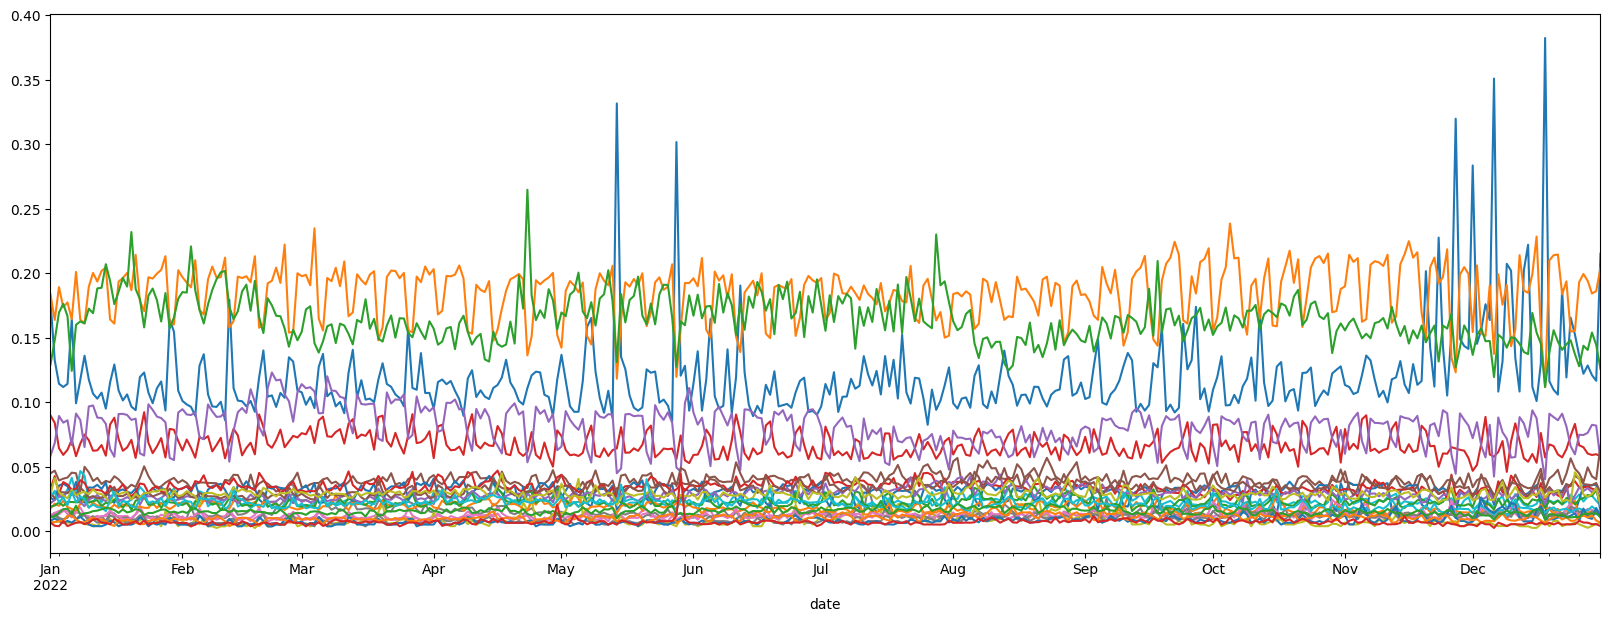

In [4]:
plot_time_series(df)

In [5]:
def treat_zeros(df: pd.DataFrame, thresh: float) -> pd.DataFrame:
    df = df.copy()
    m = (df < thresh).sum(axis=1)
    for idx, row in df.iterrows():
        mask = (row < thresh)
        m = mask.sum()
        S = row[~mask].sum()
        if not m:
            continue
        
        df.loc[idx] = row.mask(mask, thresh).where(mask, lambda x: (1 - thresh * m) * x / S)
  
    return df

In [6]:
from compotime import LocalLevelForecaster

horizon = 100

model = LocalLevelForecaster().fit(df)
predictions = model.predict(horizon)

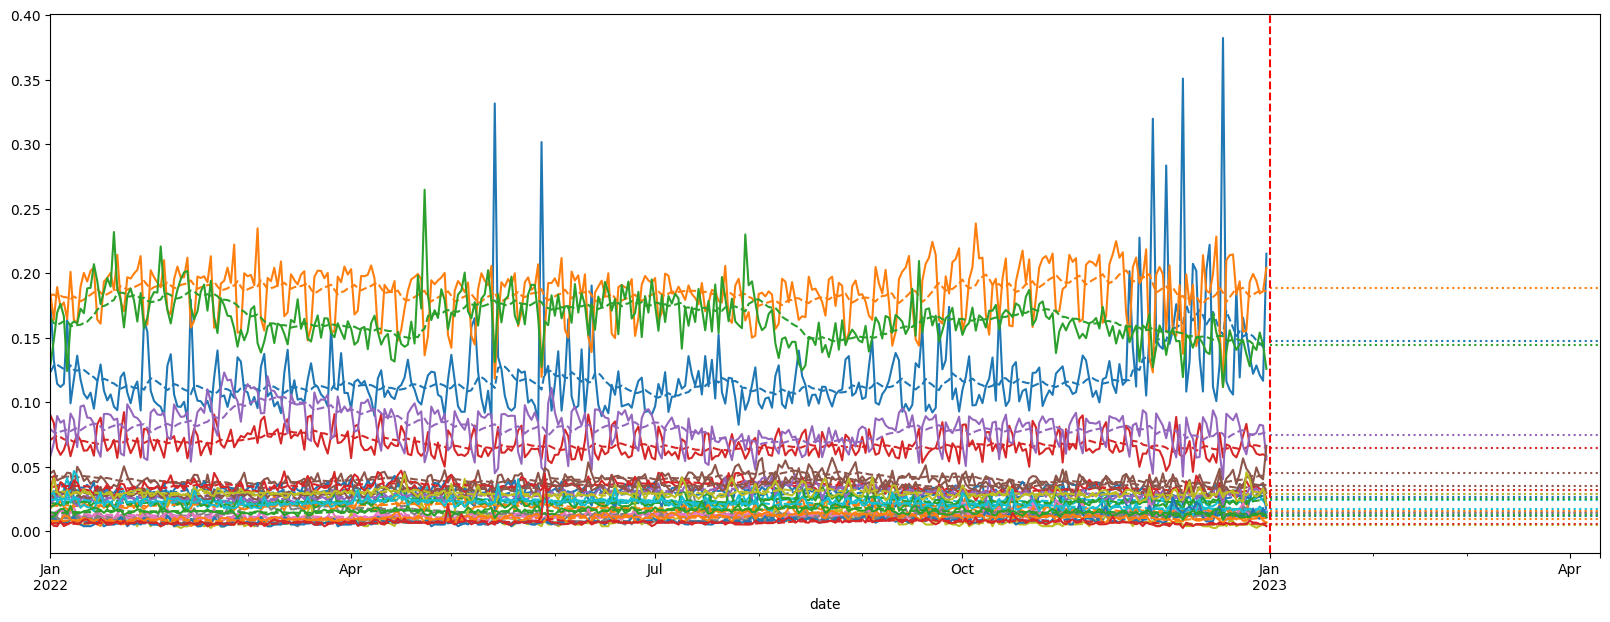

In [7]:
plot_time_series(df, model.fitted_curve_, predictions)

In [8]:
from compotime import LocalTrendForecaster

horizon = 100

model = LocalTrendForecaster().fit(df)
predictions = model.predict(horizon)

/usr/local/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


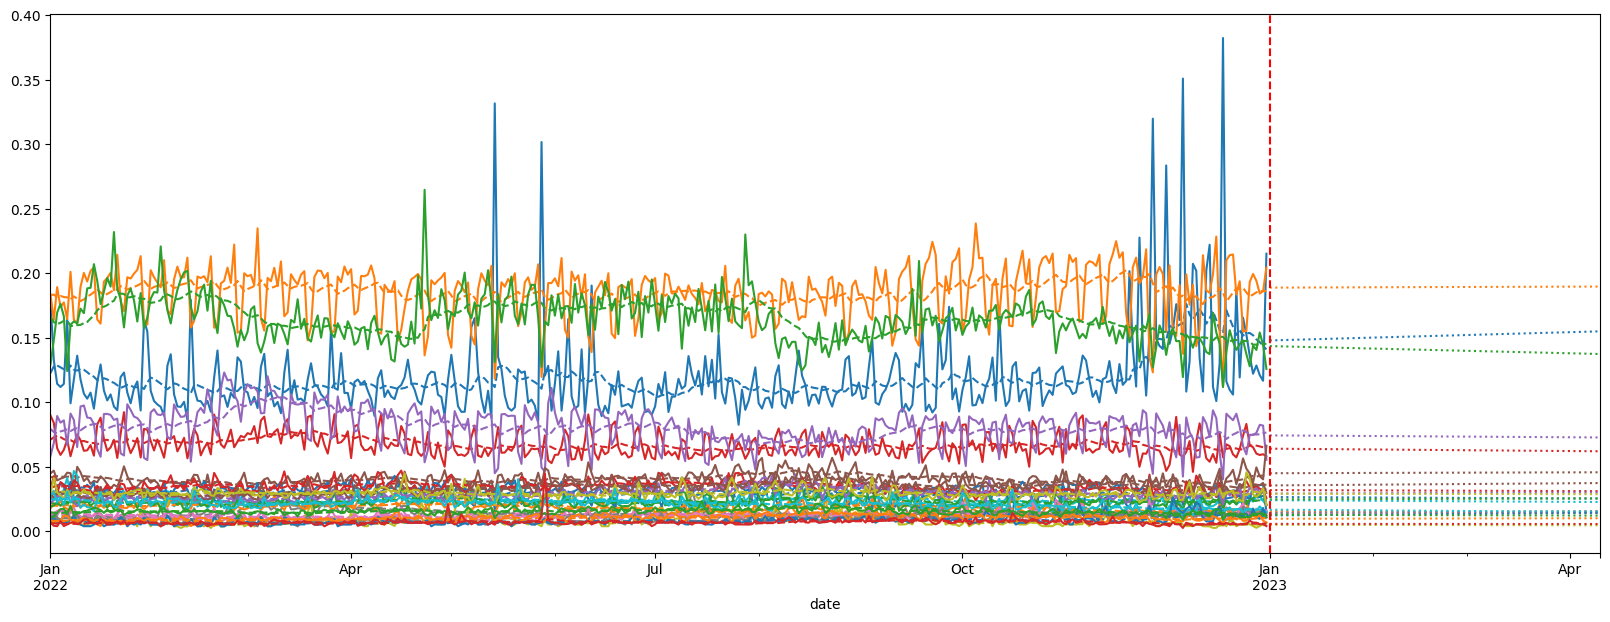

In [9]:
plot_time_series(df, model.fitted_curve_, predictions)